# 1. Introduction

## Business Understanding

Water is critical to the health of people. In Tanzania, there's a population of 59 million. Four million of these people lack access to an improved water source and 29 million lack access to improved sanitation. As most of the country is arid or semi-arid, Tanzania's ground water(wells/waterpoints) is the main source of water for the people.

There are many waterpoints already established in the country. An NGO focused on improving Tanzania's water situation would like to be able to predict functional waterpoints, those that are functional and neeed repair and those that are completely non-functional. This would go a long way in trying to maintain the already existing water infrastructure to allow for better water access across the country improving people's quality of life.

## Data understanding

The data used in this analysis is downloaded from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/).The data comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water. It has the following information about the waterpoints:

- amount_tsh - Total static head (amount water available to waterpoint)
- date_recorded - The date the row was entered
- funder - Who funded the well
- gps_height - Altitude of the well
- installer - Organization that installed the well
- longitude - GPS coordinate
- latitude - GPS coordinate
- wpt_name - Name of the waterpoint if there is one
- num_private -  Private use or not
- basin - Geographic water basin
- subvillage - Geographic location
- region - Geographic location
- region_code - Geographic location (coded)
- district_code - Geographic location (coded)
- lga - Geographic location
- ward - Geographic location
- population - Population around the well
- public_meeting - True/False
- recorded_by - Group entering this row of data
- scheme_management - Who operates the waterpoint
- scheme_name - Who operates the waterpoint
- permit - If the waterpoint is permitted
- construction_year - Year the waterpoint was constructed
- extraction_type - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management - How the waterpoint is managed
- management_group - How the waterpoint is managed
- payment - What the water costs
- payment_type - What the water costs
- water_quality - The quality of the water
- quality_group - The quality of the water
- quantity - The quantity of water
- quantity_group - The quantity of water
- source - The source of the water
- source_type - The source of the water
- source_class - The source of the water
- waterpoint_type - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

# 2. Data Cleaning

## Loading Data

In [221]:
# Importing libraries 
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [222]:
#Loading the Data

training_data = pd.read_csv('Data/Training set values.csv')
training_data_labels = pd.read_csv('Data/Training set labels.csv')

In [223]:
#Looking at the shape for training_data

print(f'Rows: {training_data.shape[0]} Columns:{training_data.shape[1]} ')

Rows: 59400 Columns:40 


In [224]:
#Looking at the shape for training_data_labels
print(f'Rows: {training_data_labels.shape[0]} Columns:{training_data_labels.shape[1]} ')

Rows: 59400 Columns:2 


In [225]:
#Merging the datasets on the common column id 

training_set = pd.merge(left = training_data, right = training_data_labels, on = 'id')

In [226]:
#Looking at the merged set

training_set.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [227]:
#Looking at the shape

training_set.shape

(59400, 41)

## Descriptive Statistics 

In [228]:
#Statistics on numerical columns
training_set.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


## Handling missing values

We need to check for how complete the data is before performing analysis and preprocessing. If null values are present, we should find a way of handling them to ensure completeness of the data.

In [229]:
training_set.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

A few columns have null values. The percentage of the amount  of missing values on these columns will have an impact on how we handle the missing data. 


In [230]:
# Calculating the percentage of missing values on each column
null_percentage = pd.DataFrame(training_set.isna().sum()/len(training_set)*100)
null_percentage=null_percentage.rename(columns = {0:'Percentage'})
null_percentage = null_percentage[(null_percentage['Percentage'] > 0)]
null_percentage.sort_values(by = 'Percentage', ascending = False)

,Percentage
scheme_name,47.417508
scheme_management,6.526936
installer,6.153199
funder,6.119529
public_meeting,5.612795
permit,5.144781
subvillage,0.624579


In [231]:
training_set[['scheme_management', 'installer', 'funder', 'public_meeting','permit','subvillage','scheme_name']]

,scheme_management,installer,funder,public_meeting,permit,subvillage,scheme_name
0,VWC,Roman,Roman,True,False,Mnyusi B,Roman
1,Other,GRUMETI,Grumeti,NaN,True,Nyamara,NaN
2,VWC,World vision,Lottery Club,True,True,Majengo,Nyumba ya mungu pipe scheme
3,VWC,UNICEF,Unicef,True,True,Mahakamani,NaN
4,NaN,Artisan,Action In A,True,True,Kyanyamisa,NaN
...,...,...,...,...,...,...,...
59395,Water Board,CES,Germany Republi,True,True,Kiduruni,Losaa Kia water supply
59396,VWC,Cefa,Cefa-njombe,True,True,Igumbilo,Ikondo electrical water sch
59397,VWC,NaN,NaN,True,False,Madungulu,NaN
59398,VWC,Musa,Malec,True,True,Mwinyi,NaN


For any variable with missing values greater than 15% of the dataset, we will eliminate these variables. They may cause trouble during the machine learning process. `scheme_name` column has 47% of it's data missing so it will therefore be dropped.

In [232]:
#Dropping scheme_name

training_set.drop(columns = 'scheme_name', inplace = True)

We will fill the missing values of the other columns with the value missing as we cannot tell whether these were emission errors or an actual category to for example show that the value of a certain column was false.

In [233]:
#Filling in the missing values 

training_set.fillna(value = 'MISSING', inplace = True)

## Checking for duplictes 

In [234]:
#Checking for duplicates 
training_set.duplicated().sum()

0

The data has no duplicates. We however need to look more into the variables as some columns seemed to have a similar description. It would be wise to look deeper into them so as to reduce redundancy and ensure we do not have columns that are completely similar. By going through the description the following columns need further investigation to ensure that our data is consistent.

- `payment` and `payment_type`

- `waterpoint_type` and `waterpoint_type_group`

- `source` and `source_type`

- `quantity` and `quantity_group`

- `water_quality` and `quality_group`

- `management` and `scheme_management`

- `extraction`, `extraction_type_group` and `extraction_type_class`

### `payment` vs `payment_type`

In [235]:
training_set['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [236]:
training_set['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Both have the same entries so we could drop `payment_type`

### `waterpoint_type` vs `waterpoint_type_group`

In [237]:
training_set['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [238]:
training_set['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

Both columns are similar, except from the feature called 'Communal Standpipe Multiple' in `waterpoint_type` which is a version of the 'Communal Standpipe'. In this case we could drop `waterpoint_type_group` 

### `source` vs `source_type`

In [239]:

training_set['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [240]:

training_set['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

The rows contain similar entries. However, both columns have aspects that are unique to them. There's more detail in `source` which describes the type of motor system that is being utilised. The `source_type` column also includes borehole that is not in `source`. In this case we could actually keep both columns.

### `quantity` vs `quantity_group`

In [241]:
training_set['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [242]:
training_set['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

The columns have similar records. We will drop `quantity_group`.

 ### `water_quality` and `quality_group`


In [243]:
training_set['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [244]:
training_set['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Both columns have the same information. Since the `water_quality` column has more detail. we will keep that one and drop the `quality_group` column.


### `management` vs `scheme_management`


In [245]:

training_set['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [246]:
training_set['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
MISSING              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [247]:
# Changing everything to lowercase

training_set['management'] = training_set['management'].str.lower()
training_set['scheme_management'] = training_set['scheme_management'].str.lower()



In [248]:
#Comparing similar vs Non-similar entries 
print('Similar entries: {}'.format(training_set.loc[(training_set['management'] == training_set['scheme_management'])].shape[0]))
print('Non-similar entries: {} '.format(training_set.loc[(training_set['management'] != training_set['scheme_management'])].shape[0]))

Similar entries: 49336
Non-similar entries: 10064 


The two columns have alot of entries that are similar, however, `management` has two extra columns: unknown and other schools. Given that `scheme_management` had 3,877 entries that were missing, `scheme_management` can be dropped.

### `extraction_type` vs `extraction_type_group` vs `extraction_type_class`

In [249]:

training_set['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [250]:

training_set['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [251]:

training_set['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The three columns have similar entries. We could keep `extraction_type_class` given that it seems to have put everything togehter in a generalized manner.

## Dropping columns

In [252]:
# Dropping columns to keep relevant ones.
training_set.drop(columns = ['waterpoint_type_group', 'source', 'quantity_group', 'quality_group', 
                   'payment_type', 'scheme_management', 'extraction_type', 'id', 
                   'num_private','extraction_type_group'], inplace=True)

In [253]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   basin                  59400 non-null  object 
 9   subvillage             59400 non-null  object 
 10  region                 59400 non-null  object 
 11  region_code            59400 non-null  int64  
 12  district_code          59400 non-null  int64  
 13  lga                    59400 non-null  object 
 14  ward                   59400 non-null  object 
 15  po

## Checking Data Types

In [254]:
#Changing date recorded to date-time
training_set['date_recorded'] = pd.to_datetime(training_set['date_recorded'])

In [255]:
#Getting year from the date 

training_set['year_recorded'] = training_set['date_recorded'].dt.year

Furhter inspection on the remaining columns unveils that some columns have so many unique values which would cause a problem while training our data.

### `installer`

In [256]:
training_set['installer'].nunique()

2146

Alot of spelling mistakes were discovered that would be the root cause of this issue. A solution for this would be to replace these words with the correct ones.

In [257]:
to_replace = {'District Water Department':'District water department', 'District water depar':'District water department',
 'Distric Water Department':'District water department','FinW':'Fini Water','Fini water':'Fini Water',
 'FINI WATER':'Fini Water','JAICA':'Jaica','COUN':'District council', 'District COUNCIL':'District council', 
 'DISTRICT COUNCIL':'District council','District Counci':'District council','District Council':'District council',
 'Council':'District council','Counc':'District council','District  Council':'District council',
 'Distri':'District council','RC CHURCH':'RC Church', 'RC Churc':'RC Church', 'RC':'RC Church',
 'RC Ch':'RC Church','RC C':'RC Church', 'RC CH':'RC Church','RC church':'RC Church', 'RC CATHORIC':'RC Church',
'Central Government':'Central government','Tanzania Government':'Central government',
'central government':'Central government','Cental Government':'Central government', 'Cebtral Government':'Central government', 
'Tanzanian Government':'Central government','Tanzania government':'Central government', 
'Centra Government' :'Central government','CENTRAL GOVERNMENT':'Central government', 'TANZANIAN GOVERNMENT':'Central government'
 ,'Central govt':'Central government', 'Centr':'Central government', 'Centra govt':'Central government','World vision':'world vision', 
 'World Division':'world vision','World Vision':'world vision', 'Unisef':'Unicef','UNICEF':'Unicef','DANID':'DANIDA', 'Hesawa':'HESAWA',
'Commu':'Community','Communit':'Community','commu':'Community','COMMU':'Community', 'COMMUNITY':'Community',
'GOVERNMENT':'Government', 'GOVER':'Government', 'GOVERNME':'Government', 'GOVERM':'Government','GOVERN':'Government','Gover':'Government',
 'Gove':'Government','Governme':'Government','Governmen':'Government',
'villigers':'villagers', 'villager':'villagers', 'Villagers':'villagers', 'Villa':'villagers', 'Village':'villagers', 'Villi':'villagers',
'Village Council':'villagers','Village Counil':'villagers', 'Villages':'villagers', 'Vill':'villagers', 'Village community':'villagers',
'Villaers':'villagers', 'Village Community':'villagers', 'Villag':'villagers','Villege Council':'villagers', 'Village council':'villagers',
'Village  Council':'villagers','Villagerd':'villagers', 'Villager':'villagers', 'Village Technician':'villagers',
'Village Office':'villagers','Village community members':'villagers', 
'Colonial Government':'Colonial government', 'Government of Misri':'Misri Government', 'Italy government':'Italian government',
'British colonial government':'British government', 'Concern /government':'Concern/Government', 'Village Government':'Village government',
'Government and Community':'Government /Community', 'Cetral government /RC':'RC church/Central Gover',
'Government /TCRS':'TCRS /Government','Government/TCRS':'TCRS /Government','ADRA /Government':'ADRA/Government'}

In [258]:

training_set['installer'].replace(to_replace, inplace = True)

In [259]:
training_set['installer'].nunique()

2055

Getting rid of the spelling mistakes gets this to 18 unique values.

In [260]:
#Listing our unique values 
training_set['installer'].unique()

array(['Roman', 'GRUMETI', 'world vision', ..., 'Dina', 'brown',
       'SELEPTA'], dtype=object)

## Feature Engineering

Using the `construction_year` and `date_recorded` we could come up with the feature `age`.

In [261]:

training_set['construction_year'].unique()

array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970,
       1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990,
       1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994,
       1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965],
      dtype=int64)

We will replace the 0 values with the median of the construction year.


In [262]:

training_set[training_set['construction_year']>0].median()

amount_tsh              0.000000
gps_height           1154.000000
longitude              36.648187
latitude               -6.064216
region_code            11.000000
district_code           3.000000
population            150.000000
construction_year    2000.000000
year_recorded        2013.000000
dtype: float64

In [263]:
training_set['construction_year'].replace(to_replace=0, value=2000, inplace = True)

In [264]:
#Creating the new column age
training_set['age'] = training_set['year_recorded'] - training_set['construction_year']

training_set['age'].unique()

array([12,  3,  4, 27, 11,  2,  0, 26, 20, 33, 19, 13, 39,  7, 41,  8,  5,
       25,  9, 38, 28, 43,  1, 16, 22, 10, 24,  6, 35, 49, 14, 15, 37, 17,
       36, 30, 51, 23, 29, 53, 50, 31, 21, 42, 18, 45, 34, 46, 40, 44, 32,
       48, 47, 52, -4, -2, -7, -5, -1, -3], dtype=int64)

We will drop the rows with negative values as errors must have occurred during recording.

In [265]:
#Dropping ages less than zero
training_set.drop(training_set[training_set['age'] < 0].index, inplace = True)

In [266]:
training_set['age'].unique()

array([12,  3,  4, 27, 11,  2,  0, 26, 20, 33, 19, 13, 39,  7, 41,  8,  5,
       25,  9, 38, 28, 43,  1, 16, 22, 10, 24,  6, 35, 49, 14, 15, 37, 17,
       36, 30, 51, 23, 29, 53, 50, 31, 21, 42, 18, 45, 34, 46, 40, 44, 32,
       48, 47, 52], dtype=int64)

In [267]:
training_set.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded,age
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,2011,12
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013,3
2,25.0,2013-02-25,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,2013,4
3,0.0,2013-01-28,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,2013,27
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011,11


We could drop `date_recorded`, `recorded_by` and `year_recorded` given as we now have `age`. We will keep `construction_year` as we might still get some insightss from this.

In [268]:
training_set.drop(columns = ['date_recorded', 'recorded_by', 'year_recorded'], inplace = True)

# 3. Exploratory Data Analysis

## Comparing the number of non-functional vs functional needs repair waterpoints

Text(0, 0.5, 'Distribution Percentage')

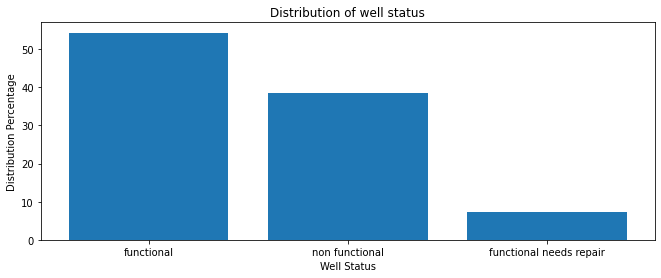

In [269]:

status = pd.DataFrame(training_set['status_group'].value_counts(normalize = True)*100)
fig, ax = plt.subplots(figsize = (11,4))
ax.bar(x = status.index, height = status['status_group'])
ax.set_title('Distribution of well status')
ax.set_xlabel('Well Status')
ax.set_ylabel('Distribution Percentage')


## Effect of type of water sources on well functionality

Text(0.5, 0, 'Water Status')

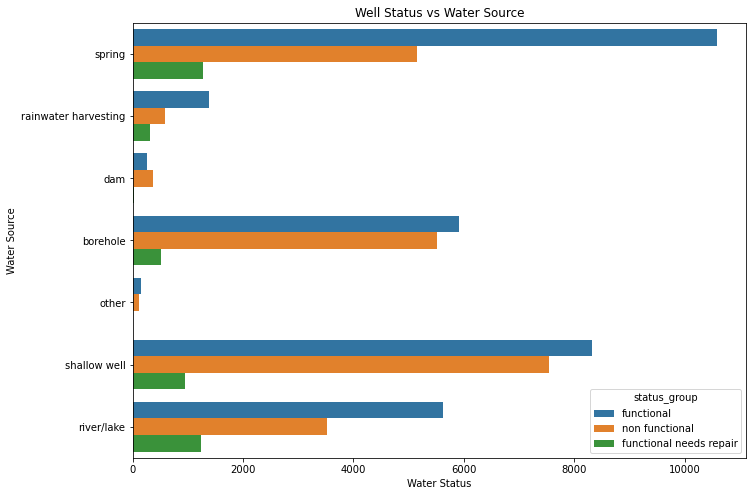

In [270]:

fig, ax = plt.subplots(figsize = (11,8))

sns.countplot(data = training_set, y = 'source_type', hue = 'status_group')

ax.set_title('Well Status vs Water Source')
ax.set_ylabel('Water Source')
ax.set_xlabel('Water Status')

Comparing the functional to the non-functional wells ratio, boreholes and shallow wells have the highest number of non-functional wells in comparisonnto the functional ones.

## Effect of extraction mechanism on well functionality

Text(0, 0.5, 'Extraction Mechanism')

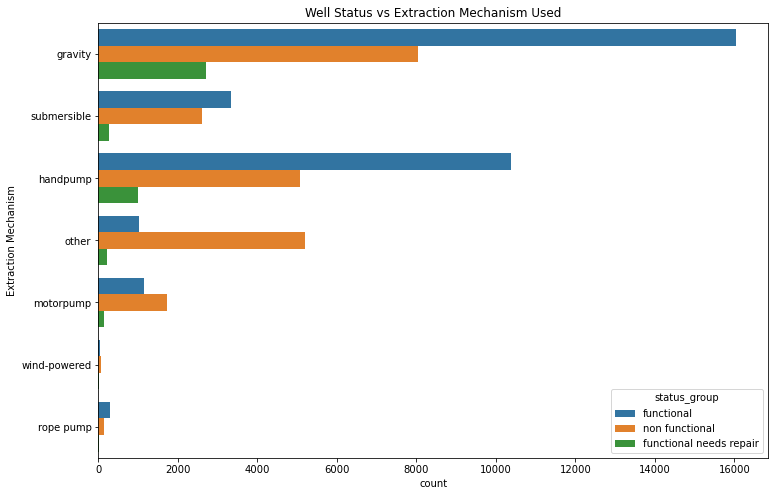

In [271]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(data = training_set, y= 'extraction_type_class', hue = 'status_group')
ax.set_title('Well Status vs Extraction Mechanism Used')
ax.set_ylabel('Extraction Mechanism')

Motorpump has a higher number of nun-functional waterpoints in comparison to the functional ones. Other means of water extraction also have a higher number of nun-functional waterponts in comparison to the functional ones. From this countplot, we can also see that gravity and handpup are the most common extraction mechanism and they both have a high number of functional wells as well as nun-functional ones.

# 4. Modelling

## Data Preprocessing

In [272]:
training_set.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,management,management_group,payment,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,age
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,...,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,12
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,...,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,3
2,25.0,Lottery Club,686,world vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,4
3,0.0,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,vwc,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,27
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,11


In [273]:
#Making relevant Imports 

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, balanced_accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### Dropping columns

In [274]:
#Dropping irrelevant columns
training_set.drop(columns = ['management_group','wpt_name','lga','subvillage', 'basin', 'region_code', 'ward', 'district_code','funder'], inplace = True)

### Categorical variables and Numerical variables

In [275]:
categorical = ['installer','public_meeting', 'permit', 'region', 'extraction_type_class','construction_year', 'management', 'payment', 'water_quality', 'quantity', 'source_type', 'source_class', 'waterpoint_type']
numerical= ['amount_tsh', 'gps_height', 'longitude', 'latitude',  'population', 'age']



### Splitting the data into test and train data

In [276]:
#Identifying the targets and features

features = training_set.drop(columns = 'status_group')
target = training_set['status_group']

In [277]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, stratify = target, random_state= 42)

### Scaling numerical columns

In [278]:
#Instatiating the scaler
scaler = StandardScaler()

#Fitting and transforming the train data
scaled_X_train = scaler.fit_transform(X_train[numerical])

#Fitting and transforming the train data
scaled_X_test= scaler.fit_transform(X_test[numerical])

# converting the results to a dataframe

scaled_df_train = pd.DataFrame(data = scaled_X_train, columns = X_train[numerical].columns, index = X_train.index)
scaled_df_test = pd.DataFrame(data = scaled_X_test, columns = X_test[numerical].columns, index = X_test.index)

### Label Encoding the Categorical Varibles

In [281]:
#Creating a dataframe with only the categorical columns
categories_df=pd.DataFrame(data=X_train,columns=X_train[categorical].columns,index = X_train.index)

#Instantiating label encoder
labelencoder = LabelEncoder()

#Changing some columns to correct datatype 
categories_df['permit']=categories_df['permit'].astype(str)
categories_df['public_meeting']=categories_df['public_meeting'].astype(str)

#Transforming columns to have labels
categories_df['public_meeting_cat']=labelencoder.fit_transform(categories_df['public_meeting'])
categories_df['installer_cat']=labelencoder.fit_transform(categories_df['installer'])
categories_df['permit_cat']=labelencoder.fit_transform(categories_df['permit'])
categories_df['region_cat']=labelencoder.fit_transform(categories_df['region'])
categories_df['extraction_type_class_cat']=labelencoder.fit_transform(categories_df['extraction_type_class'])
categories_df['construction_year_cat']=labelencoder.fit_transform(categories_df['construction_year'])
categories_df['management_cat']=labelencoder.fit_transform(categories_df['management'])
categories_df['payment_cat']=labelencoder.fit_transform(categories_df['payment'])
categories_df['water_quality_cat']=labelencoder.fit_transform(categories_df['water_quality'])
categories_df['quantity_cat']=labelencoder.fit_transform(categories_df['quantity'])
categories_df['source_type_cat']=labelencoder.fit_transform(categories_df['source_type'])
categories_df['source_class_cat']=labelencoder.fit_transform(categories_df['source_class'])
categories_df['waterpoint_type_cat']=labelencoder.fit_transform(categories_df['waterpoint_type'])

#Dropping the original columns
categories_df.drop(columns=['installer','public_meeting', 'permit', 'region', 'extraction_type_class','construction_year', 'management', 'payment', 'water_quality', 'quantity', 'source_type', 'source_class', 'waterpoint_type'],inplace=True)
categories_df

,public_meeting_cat,installer_cat,permit_cat,region_cat,extraction_type_class_cat,construction_year_cat,management_cat,payment_cat,water_quality_cat,quantity_cat,source_type_cat,source_class_cat,waterpoint_type_cat
29678,0,826,1,0,3,50,3,0,6,3,3,1,1
33845,0,1578,2,14,5,44,4,4,6,1,4,1,1
20047,2,637,0,10,1,40,7,5,6,1,5,0,4
52487,2,10,2,3,0,48,10,3,6,1,6,0,1
40918,2,298,2,16,0,51,7,3,6,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11585,2,298,2,5,0,46,9,0,6,2,4,1,1
5779,2,551,0,2,5,40,7,4,4,0,0,0,2
42760,2,1187,2,11,0,25,7,3,6,1,4,1,1
8131,2,298,0,20,0,48,7,0,4,2,6,0,1


In [284]:
categories_df1=pd.DataFrame(data=X_test,columns=X_test[categorical].columns,index = X_test.index)

#Instantiating label encoder
labelencoder = LabelEncoder()

#Changing some columns to correct datatype 
categories_df1['permit']=categories_df1['permit'].astype(str)
categories_df1['public_meeting']=categories_df1['public_meeting'].astype(str)

#Transforming columns to have labels
categories_df1['public_meeting_cat']=labelencoder.fit_transform(categories_df1['public_meeting'])
categories_df1['installer_cat']=labelencoder.fit_transform(categories_df1['installer'])
categories_df1['permit_cat']=labelencoder.fit_transform(categories_df1['permit'])
categories_df1['region_cat']=labelencoder.fit_transform(categories_df1['region'])
categories_df1['extraction_type_class_cat']=labelencoder.fit_transform(categories_df1['extraction_type_class'])
categories_df1['construction_year_cat']=labelencoder.fit_transform(categories_df1['construction_year'])
categories_df1['management_cat']=labelencoder.fit_transform(categories_df1['management'])
categories_df1['payment_cat']=labelencoder.fit_transform(categories_df1['payment'])
categories_df1['water_quality_cat']=labelencoder.fit_transform(categories_df1['water_quality'])
categories_df1['quantity_cat']=labelencoder.fit_transform(categories_df1['quantity'])
categories_df1['source_type_cat']=labelencoder.fit_transform(categories_df1['source_type'])
categories_df1['source_class_cat']=labelencoder.fit_transform(categories_df1['source_class'])
categories_df1['waterpoint_type_cat']=labelencoder.fit_transform(categories_df1['waterpoint_type'])

#Dropping the original columns
categories_df1.drop(columns=['installer','public_meeting', 'permit', 'region', 'extraction_type_class','construction_year', 'management', 'payment', 'water_quality', 'quantity', 'source_type', 'source_class', 'waterpoint_type'],inplace=True)


,public_meeting_cat,installer_cat,permit_cat,region_cat,extraction_type_class_cat,construction_year_cat,management_cat,payment_cat,water_quality_cat,quantity_cat,source_type_cat,source_class_cat,waterpoint_type_cat
49912,2,220,2,3,0,18,10,3,6,1,4,1,1
16463,2,220,2,19,1,40,7,0,4,2,0,0,4
36344,2,220,2,20,1,24,7,0,6,1,5,0,4
9830,2,653,2,0,0,30,7,0,6,1,6,0,1
17801,2,535,1,10,0,40,7,0,6,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36815,2,53,2,12,2,51,7,4,6,1,0,0,2
17929,2,946,2,20,0,25,7,0,6,1,6,0,1
28770,2,220,2,20,1,20,7,0,6,0,5,0,4
38868,2,220,0,20,0,47,7,0,6,2,4,1,1


In [285]:
#Merging the Dataframes 
preprocessed_train = pd.merge(scaled_df_train, categories_df, left_index=True, right_index=True)
preprocessed_test = pd.merge(scaled_df_test, categories_df1, left_index=True, right_index=True)

In [287]:
#Checking the shape of the data
print(preprocessed_train.shape)
print(preprocessed_test.shape)
print(y_train.shape)
print(y_test.shape)

(41573, 19)
(17818, 19)
(41573,)
(17818,)


Given as the data is now preprocessed, It is ready for modelling. In this problem, we are going to use:

- Decision Trees
- K-Nearest Neighbors 
- Random Forests


## Decision Trees 


In [288]:
#Instantaiting the model
baseline = DecisionTreeClassifier(random_state=42)
#Fitting the model
baseline.fit(preprocessed_train, y_train)

DecisionTreeClassifier(random_state=42)

In [293]:
#Function to evaluate model
def model_eval(model, X_train, y_train, X_test, y_test):
   
    labels = ['functional', 'functional needs repair', 'non functional']
    print(f'The training accuracy score is : {round(accuracy_score(y_train, model.predict(X_train)),3)}')
    print(f'The validation accuracy score is : {round(accuracy_score(y_test, model.predict(X_test)), 3)}')
    print('-------------------------------------------------')
    print(f'The training balanced accuracy score is : {round(balanced_accuracy_score(y_train, model.predict(X_train)), 3)}')
    print(f'The validation accuracy score is : {round(balanced_accuracy_score(y_test, model.predict(X_test)), 3)}')
    print('.................................................')
    print(classification_report(y_test, model.predict(X_test)))
    print('--------------------------------------------------')
    print(plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test,cmap=plt.cm.Blues,xticks_rotation='vertical'))

The training accuracy score is : 0.996
The validation accuracy score is : 0.677
-------------------------------------------------
The training balanced accuracy score is : 0.987
The validation accuracy score is : 0.567
.................................................
                         precision    recall  f1-score   support

             functional       0.75      0.70      0.72      9677
functional needs repair       0.27      0.28      0.27      1295
         non functional       0.66      0.72      0.69      6846

               accuracy                           0.68     17818
              macro avg       0.56      0.57      0.56     17818
           weighted avg       0.68      0.68      0.68     17818

--------------------------------------------------


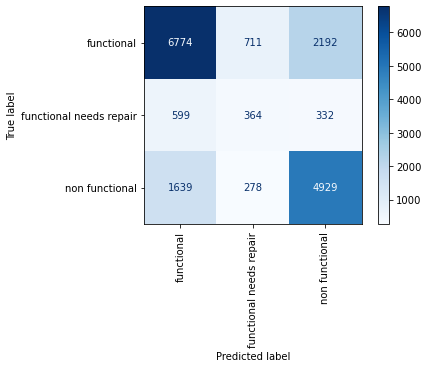

In [294]:
model_eval(baseline, preprocessed_train, y_train,preprocessed_test, y_test)

This model is ovefitting. This is because there is a very high score on the training data and a very low one on the test data. To make this better, hypeparameter tuning is required. From the Exploratory Data Analysis,we know that there is a high class imbalance, so we also need to take care of this. This class imbalance is reflected in the low f1 score that functional needs repair has.

In [295]:
#specifying tuning parameters 

tuning_parameters= {
            'criterion' : ['gini', 'entropy'],
            'max_depth': [1,10,20],
            'min_samples_leaf' : range(1,50),
            'class_weight' : [None, 'balanced']
        } 

In [296]:
#Instantiating GridSearchCV
dt_grid_search = GridSearchCV(estimator = baseline, param_grid = tuning_parameters, cv = 5,  return_train_score = True)
#Fitting
dt_grid_search.fit(preprocessed_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 20],
                         'min_samples_leaf': range(1, 50)},
             return_train_score=True)

The grid Search Cv took way too long to run. RandomizedSearchCv will be used in the other models.

In [297]:
grid_search_training_score = dt_grid_search.cv_results_['mean_train_score'].mean()

# Mean test score
grid_serch_validation_score = dt_grid_search.score(preprocessed_test, y_test)

print(f"Mean Training Score: {grid_search_training_score :.2%}")
print(f"Mean Validation Score: {grid_serch_validation_score :.2%}")
print(f"Best Parameter Combination:{dt_grid_search.best_params_}")

Mean Training Score: 69.79%
Mean Validation Score: 71.82%
Best Parameter Combination:{'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 7}


In [298]:
#Instantiating model with the best parameters

tuned_dt= DecisionTreeClassifier(criterion='gini', max_depth=20,min_samples_leaf=7,class_weight=None)

#Fitting model
tuned_dt.fit(preprocessed_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=7)

The training accuracy score is : 0.839
The validation accuracy score is : 0.717
-------------------------------------------------
The training balanced accuracy score is : 0.705
The validation accuracy score is : 0.572
.................................................
                         precision    recall  f1-score   support

             functional       0.74      0.80      0.77      9677
functional needs repair       0.43      0.22      0.29      1295
         non functional       0.70      0.70      0.70      6846

               accuracy                           0.72     17818
              macro avg       0.63      0.57      0.59     17818
           weighted avg       0.71      0.72      0.71     17818

--------------------------------------------------


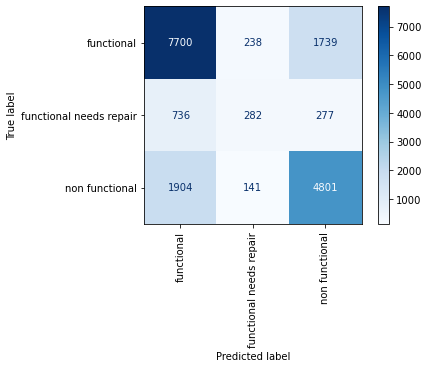

In [299]:
model_eval(tuned_dt, preprocessed_train, y_train,preprocessed_test, y_test)

From this model the difference between the training score and the the validation score is slightly lower. Another metric that has improved is the overall accuracy, from a 0.68 to a 0.72. Class imbalance however, seems to be still a problem for this model, due to the low f1-score on functional needs repair. 

## K_Nearest Neighbors

The training accuracy score is : 0.816
The validation accuracy score is : 0.534
-------------------------------------------------
The training balanced accuracy score is : 0.689
The validation accuracy score is : 0.376
.................................................
                         precision    recall  f1-score   support

             functional       0.60      0.65      0.62      9677
functional needs repair       0.04      0.01      0.01      1295
         non functional       0.46      0.47      0.47      6846

               accuracy                           0.53     17818
              macro avg       0.37      0.38      0.37     17818
           weighted avg       0.50      0.53      0.52     17818

--------------------------------------------------


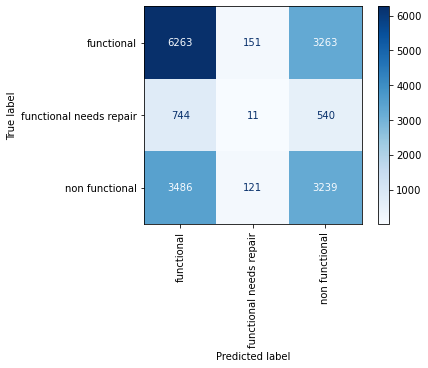

In [300]:
# insantiate a KNN classifier

knn = KNeighborsClassifier()

# fit the model with training data

knn.fit(preprocessed_train, y_train)

# evaluating the model
model_eval(knn,preprocessed_train, y_train,preprocessed_test, y_test)

The model is ovefitting as the training score is at 0.86 and the validation score at 0.53. The class imbalance problem also seems to affect it. We could tune the model to try and achieve better results.

In [301]:
#tuning parameters
knn_grid = {'n_neighbors': [5, 7, 10],'metric' : ['minkowski', 'manhattan','euclidean'],'weights': ['uniform', 'distance']}

In [302]:
# running RandomizedSearchCv

knn_random = RandomizedSearchCV(estimator = knn, 
                               param_distributions = knn_grid, 
                               n_iter = 100, 
                               cv = 5,  
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
knn_random.fit(preprocessed_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski', 'manhattan',
                                                   'euclidean'],
                                        'n_neighbors': [5, 7, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [304]:
print(f"Best Parameter Combination Found:{knn_random.best_params_}")

Best Parameter Combination Found:{'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan'}


The training accuracy score is : 0.996
The validation accuracy score is : 0.58
-------------------------------------------------
The training balanced accuracy score is : 0.991
The validation accuracy score is : 0.414
.................................................
                         precision    recall  f1-score   support

             functional       0.62      0.70      0.66      9677
functional needs repair       0.17      0.03      0.05      1295
         non functional       0.52      0.51      0.52      6846

               accuracy                           0.58     17818
              macro avg       0.44      0.41      0.41     17818
           weighted avg       0.55      0.58      0.56     17818

--------------------------------------------------


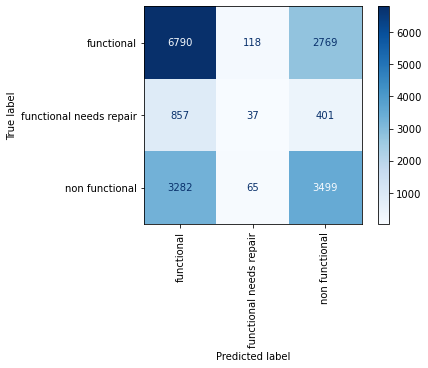

In [305]:
# using the best parameters of knn

tunned_knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 10, metric = 'manhattan')

# fit the model with training data

tunned_knn.fit(preprocessed_train, y_train)

# evaluating the model
model_eval(tunned_knn,preprocessed_train, y_train, preprocessed_test, y_test)

The model performed slightly better if accuracy is considered. However, overfitting and class imbalance are still major issues in this model.

## Random Forest